## Classificador Perceptron Simples

Ao utilizar o Perceptron Simples, temos como objetivo encontrar uma matriz de pesos W que minimize a função de custo, ou função-objetivo, associada ao erro entre as saídas estimadas e as saídas reais [1]. Essa função de custo é geralmente formulada usando diferentes funções de ativação. No caso dessa questão, foram implementadas as três seguintes: sigmóide, tangente hiperbólica e *softmax* [2, 3].

A função **sigmóide** está definida a seguir, por **$\sigma$** em função da matriz de entrada (**x**).
$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$
A função **tangente hiperbólica** tem uma formulação semelhante à da função sigmoide e pode ser descrita como na equação a seguir.

$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

Já a função ***softmax*** pode ser descrita pela equação a seguir, onde **x** é a matriz em questão e envolve a soma exponencial sobre todas as classes.

$$
\text{softmax}(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

No caso dessa implementação, o perceptron simples foi treinado em 500 épocas, com taxa de aprendizado de 0.01. Dessa forma, a cada época, os pesos eram atualizados com base no gradiente do erro e na taxa de aprendizado. Os pesos foram iniciados de forma aleatória, com distribuição normal.

### Sobre o dataset
A classificação foi feita para o *dataset* MNIST, de dígitos feitos à mão [4], que é composto por 60 mil imagens de treino e 10 mil imagens de teste. Todas elas são de dimensões 28x28 *pixels* e possuem suas respectivas classes (*labels*). O único pré-processamento utilizado foi a vetorização das imagens e a concatenação da matriz de imagens com um vetor de viés (*bias*), resultando em 785 atributos para a classificação. As *labels* também foram convertidas para o formato de vetor (*one hot*).

**Referências:**
1. A. Webb. *Statistical Pattern Recognition*. John Wiley & Sons, 2nd edition, 2002.
2. M.-L. Zhang and Z.-H. Zhou, “A review on multi-label learning algorithms", *IEEE transactions on knowledge and data engineering*, vol. 26, no. 8, pp. 1819–1837, 2013.
3. Hastie, T., Tibshirani, R., Friedman, J., *The elements of statistical learning: Data mining, inference, and prediction*. Springer, 2009.
4. Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." *Proceedings of the IEEE*, 86(11):2278-2324, November 1998.86(11):2278-2324, November 1998.(11):2278-2324, November 1998.

2


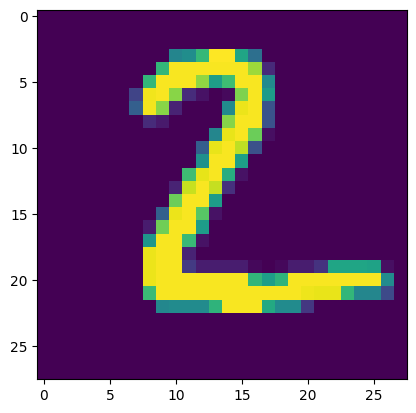

In [4]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

train_images_path = '../Datasets/MNIST/train-images.idx3-ubyte'
train_labels_path = '../Datasets/MNIST/train-labels.idx1-ubyte'
test_images_path = '../Datasets/MNIST/t10k-images.idx3-ubyte'
test_labels_path = '../Datasets/MNIST/t10k-labels.idx1-ubyte'

# Carregar o conjunto de treino para avaliação
arr_images_train = idx2numpy.convert_from_file(train_images_path)
arr_labels_train = idx2numpy.convert_from_file(train_labels_path).astype(int)

# Carregar o conjunto de teste para avaliação
arr_images_test = idx2numpy.convert_from_file(test_images_path)
arr_labels_test = idx2numpy.convert_from_file(test_labels_path).astype(int)

example = np.asarray(arr_images_test[1]).squeeze()
plt.imshow(example)

print(arr_labels_test[1])

In [5]:
print(arr_images_train.shape, arr_labels_train.shape)

(60000, 28, 28) (60000,)


In [6]:
# Transformar as imagens em vetores
X_train = arr_images_train.reshape(arr_images_train.shape[0], -1)
X_test = arr_images_test.reshape(arr_images_test.shape[0], -1)

# Adicionar uma coluna de 1s para considerar o termo de bias (intercept) no modelo linear
X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

# Colocar y em formato de vetor (one hot)
def one_hot_convert(vec):
    matrix = []
    for idx in vec:
      m = np.zeros((10, 1))
      m[idx] = 1
      matrix.append(m)
    return np.array(matrix)

y_train = one_hot_convert(arr_labels_train).reshape(arr_labels_train.shape[0], -1)
y_test = arr_labels_test.reshape(arr_labels_test.shape[0], -1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 785) (60000, 10)
(10000, 785) (10000, 1)


In [7]:
# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)   
    elif type == 'tanh':
        return np.tanh(matrix)
    elif type == 'step':
        return np.heaviside(matrix, 1)

# Função de treino para o classificador perceptron logístico
def train_logistic_perceptron(X, y, epochs, l_rate):
    weights = np.random.randn(y.shape[1], X.shape[1]) * 0.1 # Matriz com dimensões: num_classes X num_atributos
    
    for epoch in range(epochs): # Iterando épocas
        
        z = X @ weights.T
        result = activate_functions('step', z)
        error =  result - y # Erro por classe
        grad = error / len(X)

        # Ajustar os pesos para cada classe separadamente
        weights -= l_rate * np.dot(grad.T, X)

        if epoch % 5 == 0:
            print('Epoch: {}/{}'.format(epoch, epochs))
            
    print('Done!')
    
    return weights

# Treinar o classificador
weights = train_logistic_perceptron(X_train, y_train, epochs=500, l_rate=0.01)
print(weights.shape)

Epoch: 0/500
Epoch: 5/500
Epoch: 10/500
Epoch: 15/500
Epoch: 20/500
Epoch: 25/500
Epoch: 30/500
Epoch: 35/500
Epoch: 40/500
Epoch: 45/500
Epoch: 50/500
Epoch: 55/500
Epoch: 60/500
Epoch: 65/500
Epoch: 70/500
Epoch: 75/500
Epoch: 80/500
Epoch: 85/500
Epoch: 90/500
Epoch: 95/500
Epoch: 100/500
Epoch: 105/500
Epoch: 110/500
Epoch: 115/500
Epoch: 120/500
Epoch: 125/500
Epoch: 130/500
Epoch: 135/500
Epoch: 140/500
Epoch: 145/500
Epoch: 150/500
Epoch: 155/500
Epoch: 160/500
Epoch: 165/500
Epoch: 170/500
Epoch: 175/500
Epoch: 180/500
Epoch: 185/500
Epoch: 190/500
Epoch: 195/500
Epoch: 200/500
Epoch: 205/500
Epoch: 210/500
Epoch: 215/500
Epoch: 220/500
Epoch: 225/500
Epoch: 230/500
Epoch: 235/500
Epoch: 240/500
Epoch: 245/500
Epoch: 250/500
Epoch: 255/500
Epoch: 260/500
Epoch: 265/500
Epoch: 270/500
Epoch: 275/500
Epoch: 280/500
Epoch: 285/500
Epoch: 290/500
Epoch: 295/500
Epoch: 300/500
Epoch: 305/500
Epoch: 310/500
Epoch: 315/500
Epoch: 320/500
Epoch: 325/500
Epoch: 330/500
Epoch: 335/500
Ep

In [8]:
# Função de predição usando o classificador linear
def predict_logistic_perceptron(X, W):
    z = X @ weights.T
    result = activate_functions('step', z)

    # Converte as saídas para as classes preditas (0 a 9) usando a função argmax
    # A classe predita será o índice do valor máximo em cada linha
    classe = np.argmax(result, axis=1)

    return np.expand_dims(classe, axis=1)

# Realizar a predição no conjunto de teste
y_pred_test = predict_logistic_perceptron(X_test, weights)

print(y_pred_test.shape)
print(y_test.shape)

(10000, 1)
(10000, 1)


In [9]:
# Avaliar o desempenho do classificador
error = (10000 - sum(y_pred_test == y_test)) / 10000 
print("Error: {}".format(error[0]))
print("Accuracy: {}".format(1 - error[0]))

Error: 0.17
Accuracy: 0.83
